In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from cnmaps import get_adm_maps,draw_maps
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy as np

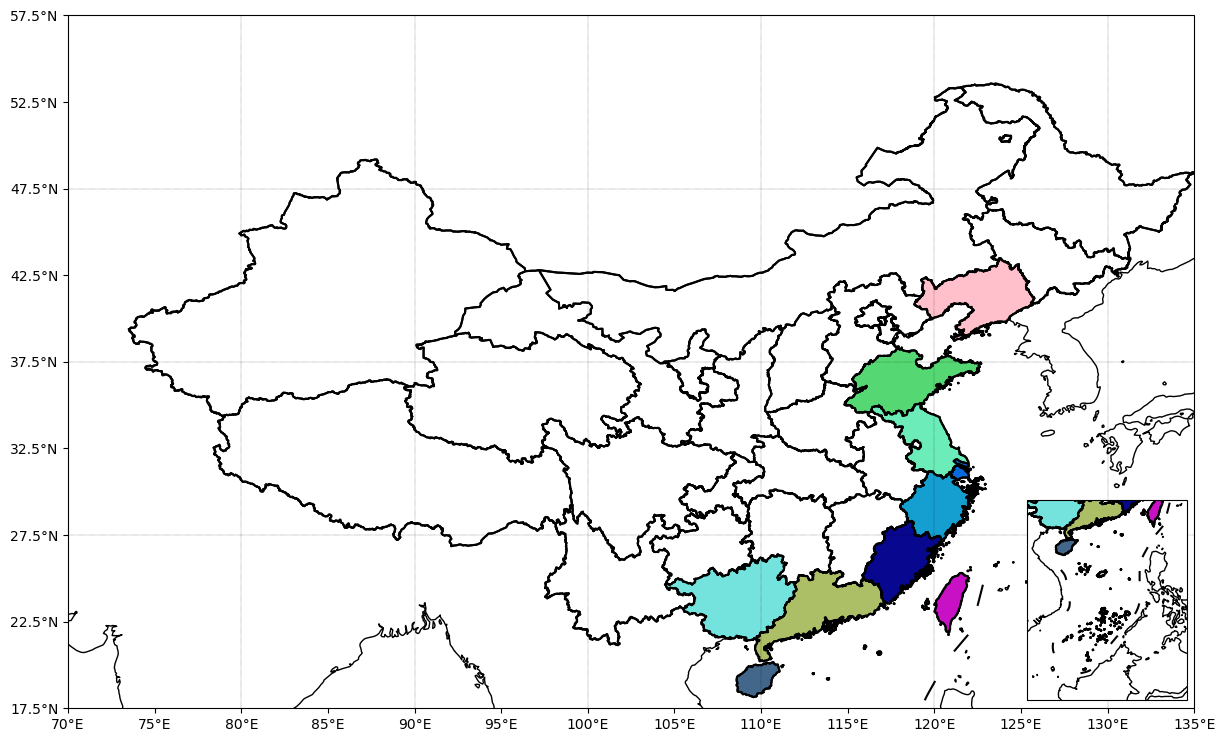

In [4]:
box1 = [70, 135, 17.5, 55]
box2 = [105, 125, 0, 25]
xstep=5
ystep=5
fig=plt.figure(figsize=(16,9))
ax=fig.subplots(1,1,subplot_kw={'projection':ccrs.PlateCarree(central_longitude=110)})
ax.coastlines("50m")
draw_maps(get_adm_maps(level='国'))
draw_maps(get_adm_maps(level='省'))
colors=['#74E3DD','#ACBF67','#43668B','#07078F','#C810C5','#159ED0','#6BECB9','#076ADC','#55D873','pink']
provincelist=['广西壮族自治区','广东省','海南省','福建省','台湾省','浙江省','江苏省','上海市','山东省','辽宁省']
for i,j in zip(colors,provincelist):
    GX=get_adm_maps(province=j,only_polygon=True)
    ax.add_geometries(GX,crs=ccrs.PlateCarree(),facecolor=i)
# 坐标轴
## 标注坐标轴
ax.set_extent(box1,crs=ccrs.PlateCarree())
ax.set_xticks(np.arange(box1[0], box1[1] + 5, 5), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(box1[2], box1[3] + 5, 5), crs=ccrs.PlateCarree())
## 经纬度格式，把0经度设置不加E和W
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax.gridlines(xlocs=np.arange(box1[0], box1[1] + 10, 10), ylocs=np.arange(box1[2], box1[3] + 10, 10), linestyle=':', linewidth=0.3, x_inline=False, y_inline=False, color='k')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# 南海子图
ax2 = fig.add_axes([0.76, 0.08, 0.1, 0.3], projection=ccrs.PlateCarree())
ax2.coastlines('50m')
ax2.set_extent(box2, crs=ccrs.PlateCarree())
draw_maps(get_adm_maps(level='国'))
draw_maps(get_adm_maps(level='省'))
for i,j in zip(['#74E3DD','#ACBF67','#43668B','#C810C5','#07078F'],['广西壮族自治区','广东省','海南省','台湾省','福建省']):
    GX=get_adm_maps(province=j,only_polygon=True)
    ax2.add_geometries(GX,crs=ccrs.PlateCarree(),facecolor=i)
plt.savefig('TcProvince.png',dpi=500)